In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

In [2]:
def decode_segmap(label_mask, plot=False):
    """Decode segmentation class labels into a color image
    Args:
        label_mask (np.ndarray): an (M,N) array of integer values denoting
          the class label at each spatial location.
        plot (bool, optional): whether to show the resulting color image
          in a figure.
    Returns:
        (np.ndarray, optional): the resulting decoded color image.
    """
    label_colours = np.asarray([ [69,117,180], [145,191,219], [224,243,248], [254,224,144], [252,141,89],
                      [215,48,39]])
    r = label_mask.copy()
    g = label_mask.copy()
    b = label_mask.copy()
    for ll in range(0, 6):
        r[label_mask == ll] = label_colours[ll, 0]
        g[label_mask == ll] = label_colours[ll, 1]
        b[label_mask == ll] = label_colours[ll, 2]
    rgb = np.zeros((label_mask.shape[0], label_mask.shape[1], 3))
    rgb[:, :, 0] = r / 255.0
    rgb[:, :, 1] = g / 255.0
    rgb[:, :, 2] = b / 255.0
    if plot:
        plt.imshow(rgb)
        plt.show()
    else:
        return rgb

In [3]:
def reverse_segmap(segmap):
    label_colours = np.asarray([ [69,117,180], [145,191,219], [224,243,248], [254,224,144], [252,141,89],
                      [215,48,39]])
#     ori = np.arange(6) / 6*255
    ori = np.arange(6)
    for ll in range(0, 6):
        idx = np.where((segmap == label_colours[ll]).all(-1))
        segmap[idx] = ori[ll]
    return segmap

In [4]:
label_colours = np.asarray([ [69,117,180], [145,191,219], [224,243,248], [254,224,144], [252,141,89],
                      [215,48,39]])

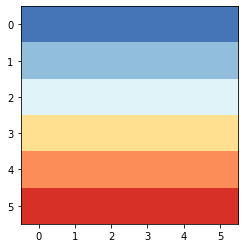

In [5]:
a = np.zeros((6, 6, 3)).astype("uint8")
for i in range(6):
    a[i] = label_colours[i]
    
plt.imshow(a)

In [6]:
data = np.load(f"runs-section/Sep01_105122_segformer_test/test1_99_res.npz")
seismic = data["origin"]
label = data["originlabel"]
pred = data["pred"]

In [7]:
seismic.shape, label.shape, pred.shape

((3, 256, 688), (255, 701, 3), (255, 701))

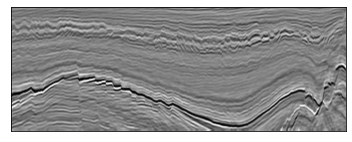

In [8]:
plt.imshow(seismic[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.imsave("inline/seismic.png", seismic[0], cmap="gray",dpi=300)

In [9]:
(label[0]==label[1]).all()

False

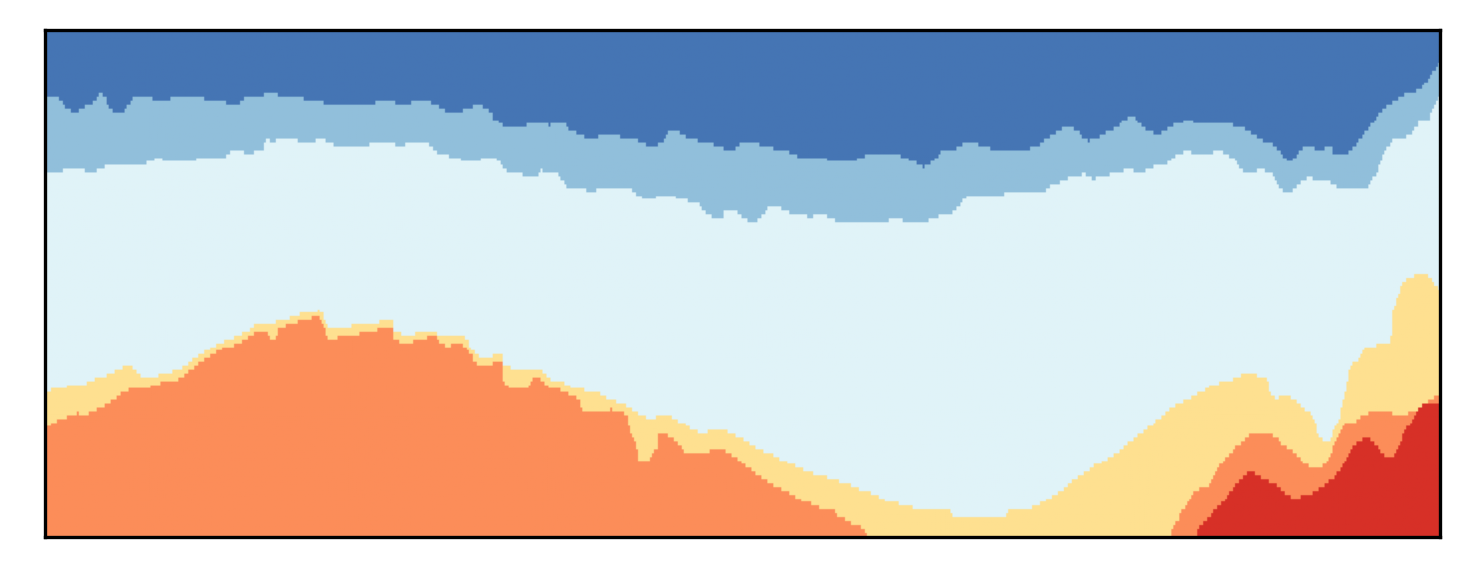

In [10]:
plt.imshow(label)
plt.xticks([])
plt.yticks([])
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.imsave("inline/label.png", label,dpi=300)

In [11]:
label.dtype, np.unique((label*255).astype('uint8'))

(dtype('float64'),
 array([ 39,  48,  69,  89, 117, 141, 144, 145, 180, 191, 215, 219, 224,
        243, 248, 252, 254], dtype=uint8))

In [12]:
seismic.dtype, seismic.max(), seismic.min()

(dtype('float32'), 1.0, 0.0)

In [13]:
label = np.uint8(label*255)
label = reverse_segmap(label)
seismic = np.transpose(seismic*255, (1,2,0)).astype("uint8")

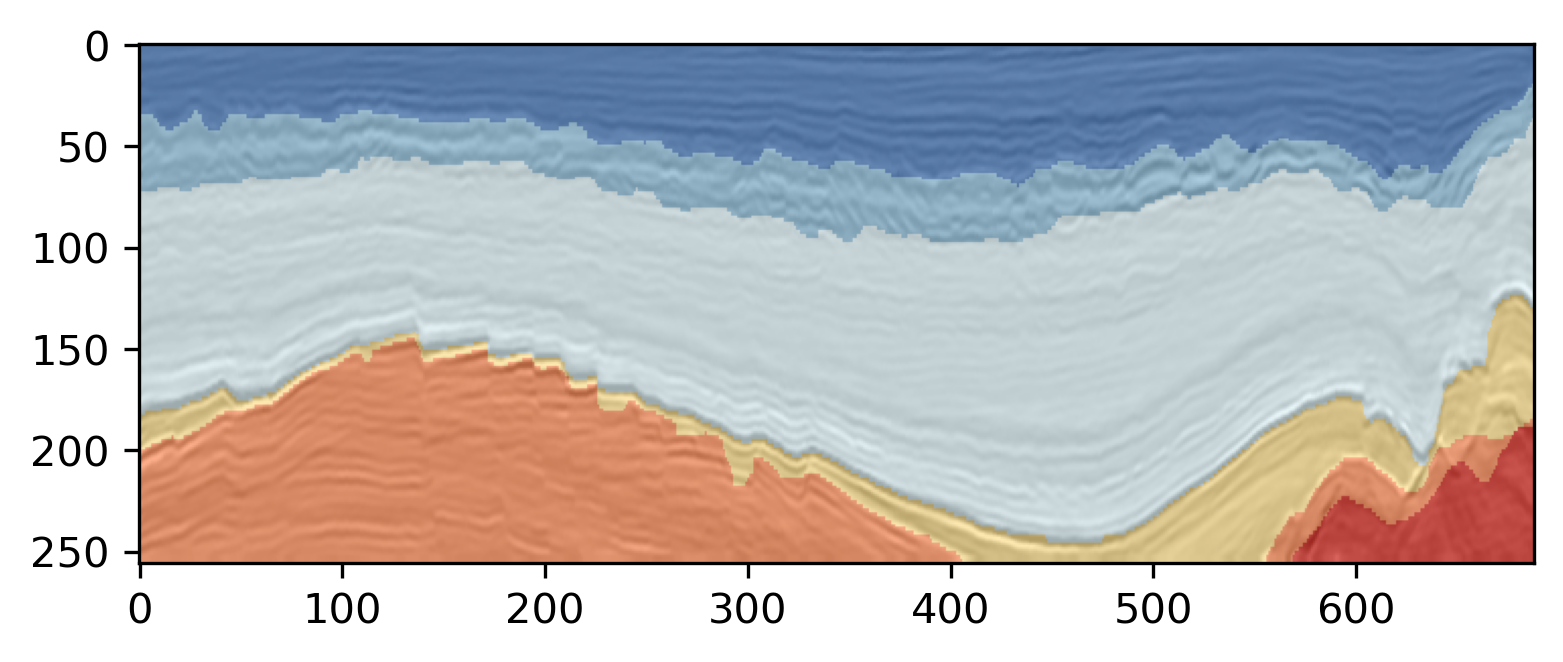

In [14]:
segmap = SegmentationMapsOnImage(label, seismic.shape)
data_wpred = segmap.draw_on_image(seismic, alpha=0.7, draw_background=True, colors=label_colours)[0]
fig = plt.figure()
plt.imshow(data_wpred)

## 正式

### segformer+section

In [15]:
benckmark = "runs-section/Sep04_093055_section_deconvnet_skip_test"
segformer_sec = "runs-section/Sep01_105122_segformer_test"
USegformer_sec = "runs-section/Sep01_120249_usegformer_test"
USegformerHyper_sec = "runs-section/Aug29_164926_usegformerhyper_test"

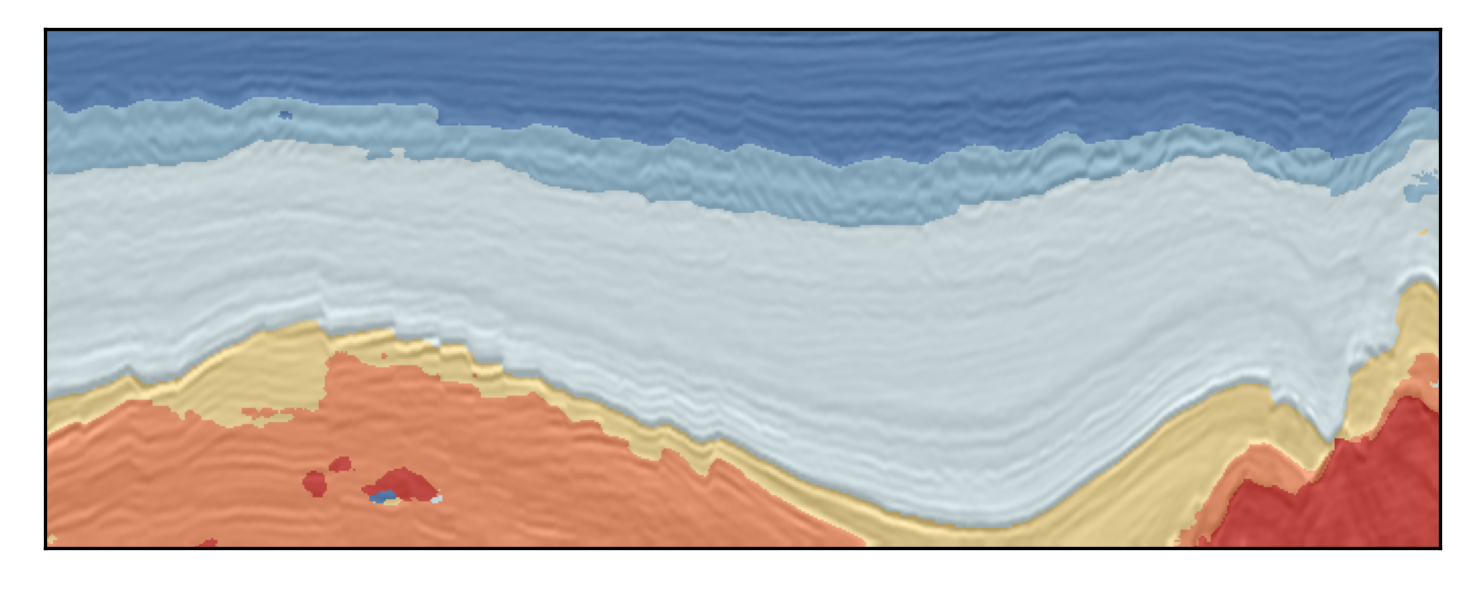

In [16]:
data = np.load(f"{benckmark}/test1_99_res.npz")
pred = data["pred"]
segmap = SegmentationMapsOnImage(np.uint8(pred), seismic.shape)
data_wpred = segmap.draw_on_image(seismic, alpha=0.7, draw_background=True, colors=label_colours)[0]
fig = plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(data_wpred)
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.imsave("inline/benckmark_sec.png", data_wpred,dpi=300)

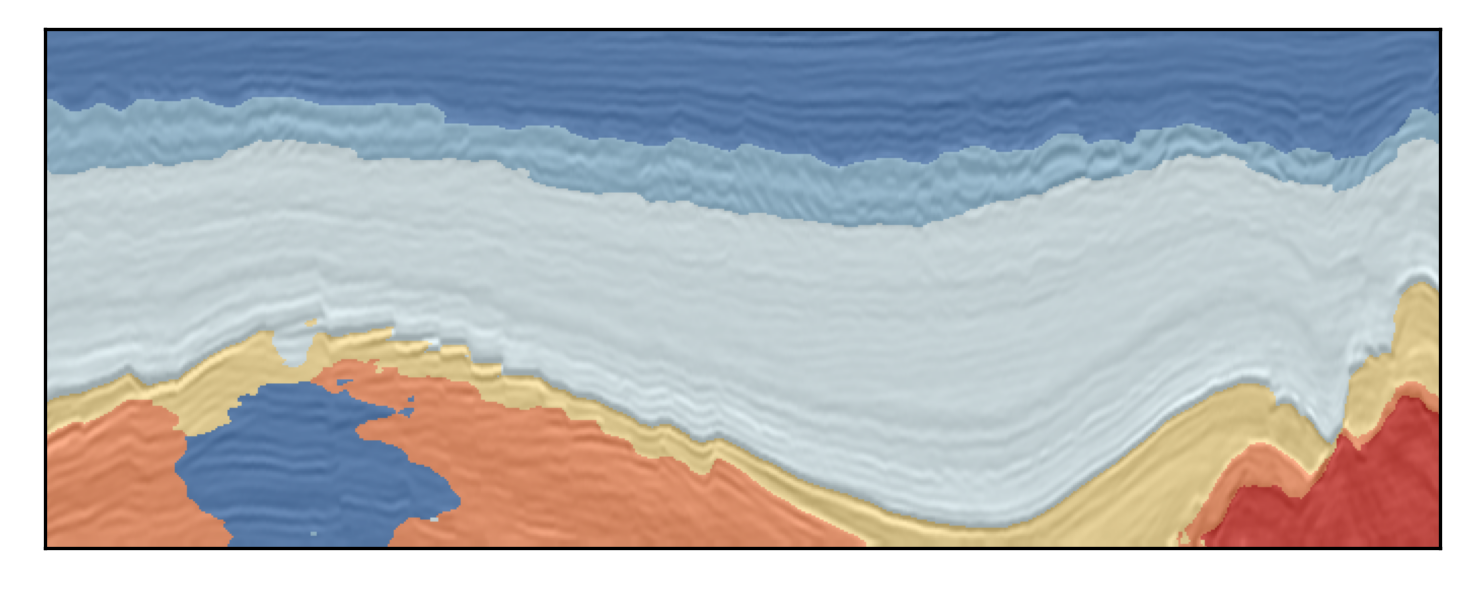

In [17]:
data = np.load(f"{segformer_sec}/test1_99_res.npz")
pred = data["pred"]
segmap = SegmentationMapsOnImage(np.uint8(pred), seismic.shape)
data_wpred = segmap.draw_on_image(seismic, alpha=0.7, draw_background=True, colors=label_colours)[0]
fig = plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(data_wpred)
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.imsave("inline/segformer_sec.png", data_wpred,dpi=300)

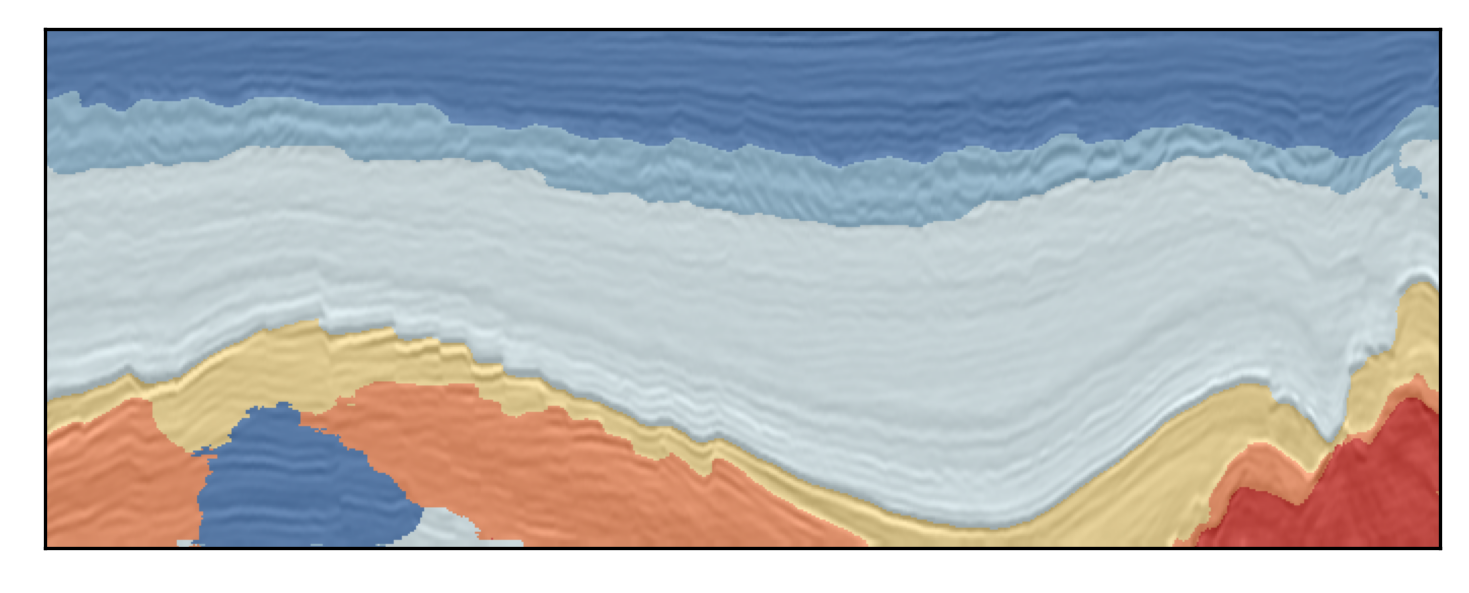

In [18]:
data = np.load(f"{USegformer_sec}/test1_99_res.npz")
pred = data["pred"]
segmap = SegmentationMapsOnImage(np.uint8(pred), seismic.shape)
data_wpred = segmap.draw_on_image(seismic, alpha=0.7, draw_background=True, colors=label_colours)[0]
fig = plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(data_wpred)
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.imsave("inline/USegformer_sec.png", data_wpred,dpi=300)

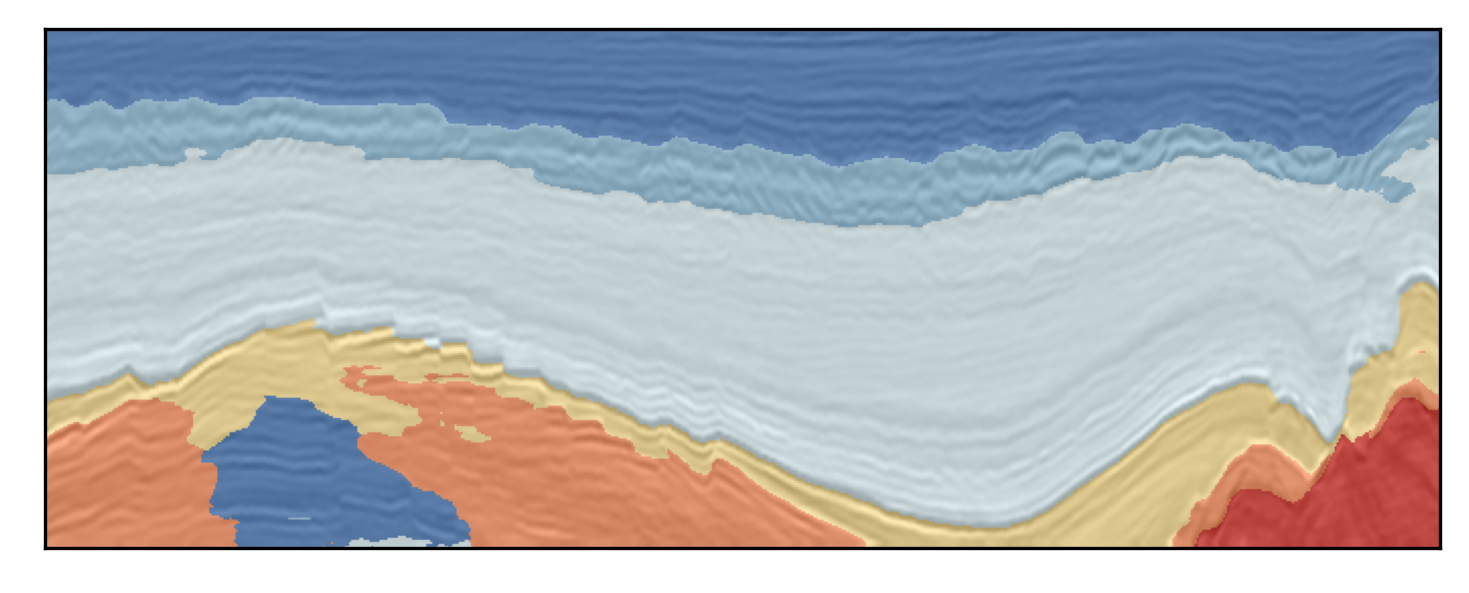

In [19]:
data = np.load(f"{USegformerHyper_sec}/test1_99_res.npz")
pred = data["pred"]
segmap = SegmentationMapsOnImage(np.uint8(pred), seismic.shape)
data_wpred = segmap.draw_on_image(seismic, alpha=0.7, draw_background=True, colors=label_colours)[0]
fig = plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(data_wpred)
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.imsave("inline/U_segformer_hyper_sec.png", data_wpred,dpi=300)

### segformer+patch

In [20]:
benckmark = "runs-patch/Sep03_112341__patch_deconvnet_skip"
segformer_patch = "runs-patch/Aug28_230635_segformer"
USegformer_patch = "runs-patch/Aug28_155525_usegformer"
USegformerHyper_patch = "runs-patch/Sep03_091818_usegformerhyper"

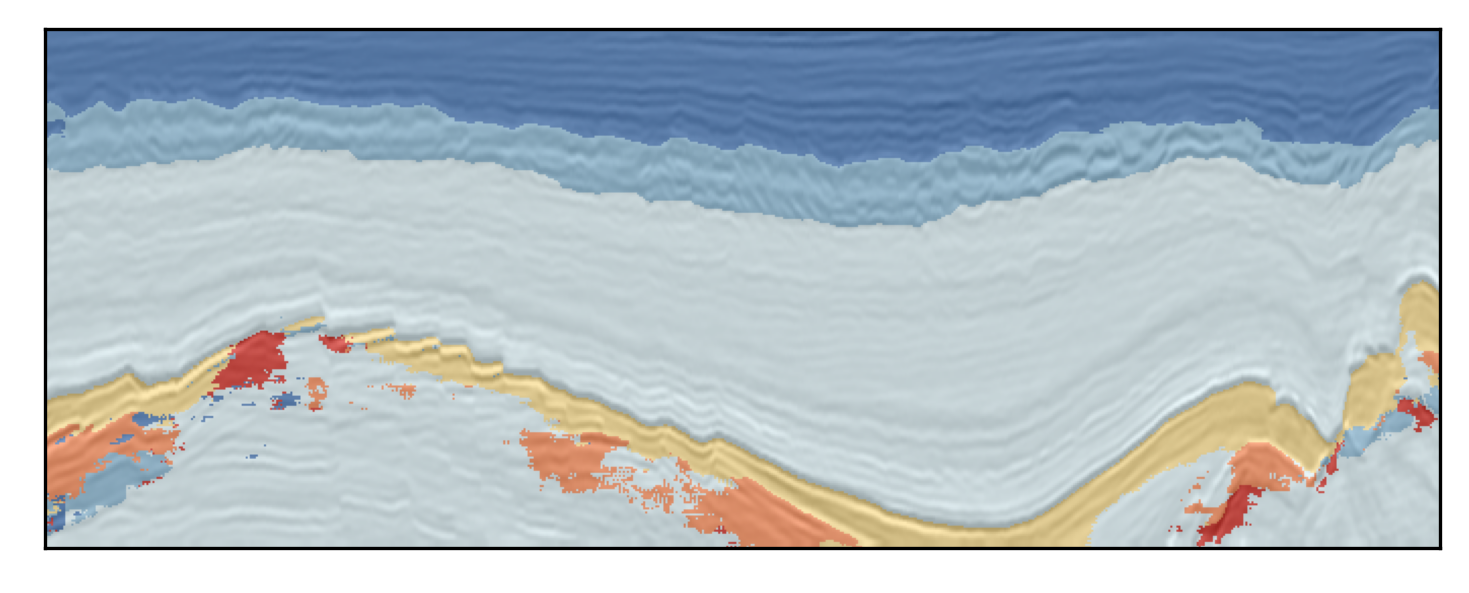

In [21]:
data = np.load(f"{benckmark}_test/test1_99_res.npz")
pred = data["pred"]
segmap = SegmentationMapsOnImage(np.uint8(pred), seismic.shape)
data_wpred = segmap.draw_on_image(seismic, alpha=0.7, draw_background=True, colors=label_colours)[0]
fig = plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(data_wpred)
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.imsave("inline/benckmark_patch.png", data_wpred,dpi=300)

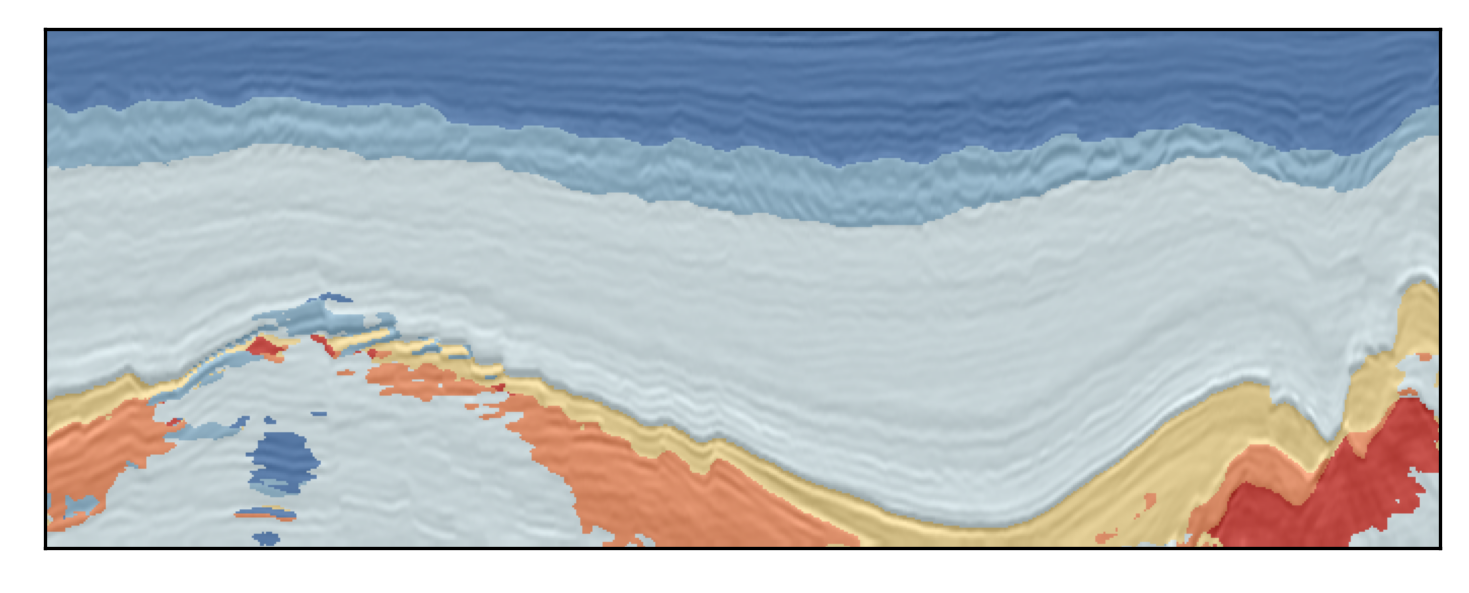

In [22]:
data = np.load(f"{segformer_patch}_test/test1_99_res.npz")
pred = data["pred"]
segmap = SegmentationMapsOnImage(np.uint8(pred), seismic.shape)
data_wpred = segmap.draw_on_image(seismic, alpha=0.7, draw_background=True, colors=label_colours)[0]
fig = plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(data_wpred)
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.imsave("inline/segformer_patch.png", data_wpred,dpi=300)

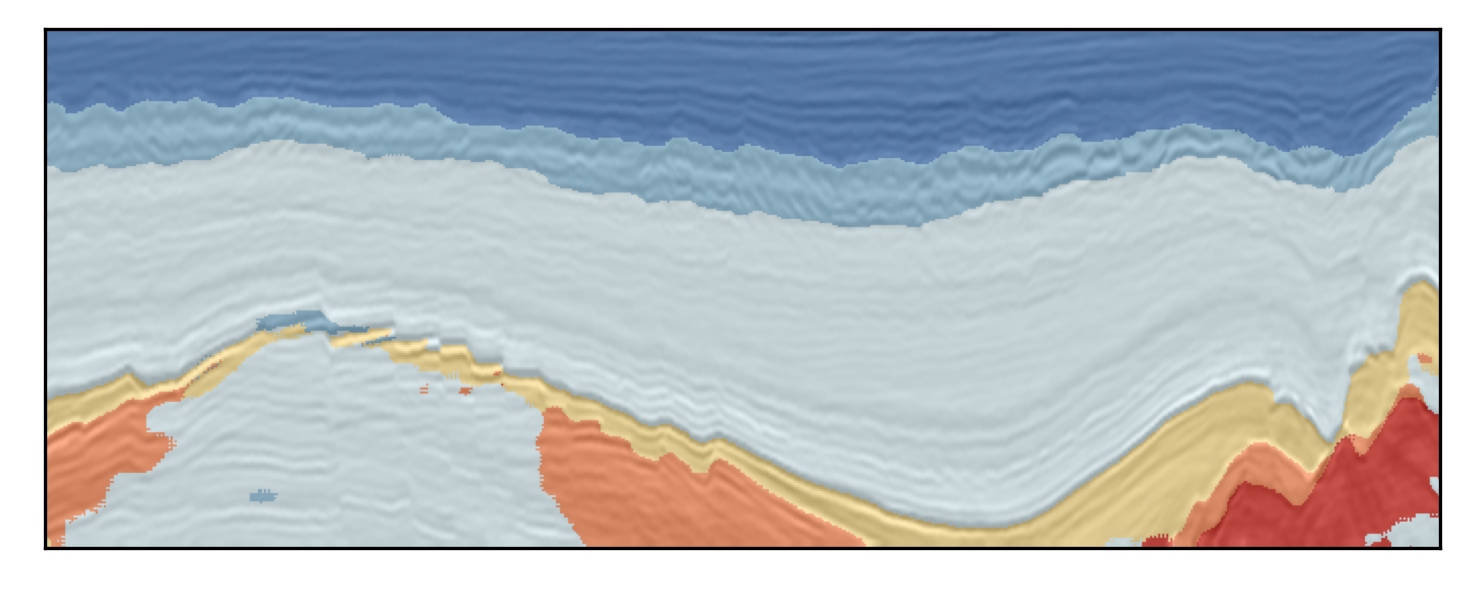

In [23]:
data = np.load(f"{USegformer_patch}_test/test1_99_res.npz")
pred = data["pred"]
segmap = SegmentationMapsOnImage(np.uint8(pred), seismic.shape)
data_wpred = segmap.draw_on_image(seismic, alpha=0.7, draw_background=True, colors=label_colours)[0]
fig = plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(data_wpred)
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.imsave("inline/USegformer_patch.png", data_wpred,dpi=300)

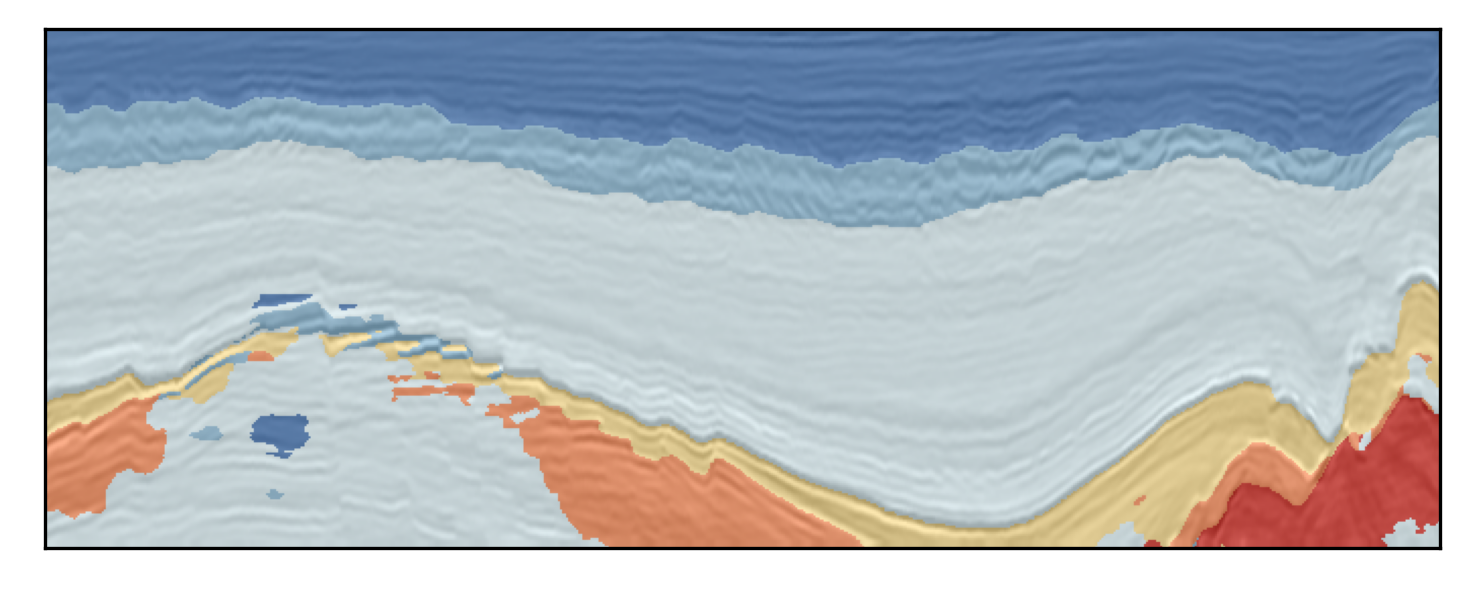

In [24]:
data = np.load(f"{USegformerHyper_patch}_test/test1_99_res.npz")
pred = data["pred"]
segmap = SegmentationMapsOnImage(np.uint8(pred), seismic.shape)
data_wpred = segmap.draw_on_image(seismic, alpha=0.7, draw_background=True, colors=label_colours)[0]
fig = plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(data_wpred)
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.imsave("inline/USegformerHyper_patch.png", data_wpred,dpi=300)